In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy
import glob
import pylab as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
#from skimage import io, color
from numpy import save
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import seaborn as sns

In [ ]:
Coviddf = pd.read_csv('/content/drive/My Drive/final_dataset/CovidPreprocess.csv')
#Pneumoniadf = pd.read_csv('/home/sumona/Desktop/covidxray/final_dataset/PneumoniaPreProcess.csv')
Normaldf = pd.read_csv('/content/drive/My Drive/final_dataset/NormalPreprocess.csv')

In [ ]:
print(Coviddf)
print(Normaldf)

        0      1      2      3      4  ...  50171  50172  50173  50174  50175
0    23.0   24.5   25.5   24.5   24.0  ...   15.0   -7.5   -4.0   -9.0   17.5
1    26.5  171.5  227.5  212.5  169.0  ...    1.0    0.0    0.0    0.0    0.0
2    92.5  249.0   89.0    9.0    1.5  ...    0.0    5.5    3.5  -10.5  103.0
3     2.5   51.0  206.5  238.5  145.5  ...    0.0    0.0    0.0    0.0    0.0
4    11.5   13.0   13.0    1.0   81.0  ...    0.0    0.0    0.0    0.0    0.0
..    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
182   9.5    0.0    4.5    7.5   21.5  ...   -4.0   10.5   -4.5   -0.5    8.0
183  39.0    0.0    3.5    9.5    2.5  ...  -11.5    3.5   -8.5   -2.0    9.0
184   0.0    0.0    0.0    0.0    2.5  ...   -2.5   -1.5   -2.0   -3.0    9.0
185   1.5    4.5    1.0    9.0    4.0  ...   -1.0    4.0    2.0    1.0    0.5
186   6.5    6.0    7.0    8.5    1.0  ...   -1.5    0.0    0.0    0.0    0.0

[187 rows x 50176 columns]
         0      1      2      3  ...

In [ ]:
CNNCoviddf =pd.read_csv("/content/drive/My Drive/final_dataset/CNNcovidfeature.csv")
# CNNpneumoniadf =pd.read_csv('/home/sumona/Desktop/covidxray/final_dataset/CNNpneumoniafeature.csv')

CNNCoviddf  = CNNCoviddf .drop(columns=['Unnamed: 0'])
CNNNormaldf =pd.read_csv("/content/drive/My Drive/final_dataset/CNNnormalfeature.csv")

CNNNormaldf = CNNNormaldf.drop(columns=['Unnamed: 0'])

In [ ]:
print(CNNCoviddf)

            0         1    2         3  ...  50172     50173      50174     50175
0    0.000066  0.032173  0.0  0.011439  ...    0.0  0.000000   1.214022  0.000000
1    0.000000  0.000000  0.0  0.000000  ...    0.0  2.096100   5.954572  0.000000
2    0.000000  0.000000  0.0  0.018216  ...    0.0  3.283178   4.058571  0.000000
3    0.000000  0.000000  0.0  0.000000  ...    0.0  3.952176   2.684034  0.000000
4    0.000000  0.011882  0.0  0.001277  ...    0.0  0.000000   3.632238  0.000000
..        ...       ...  ...       ...  ...    ...       ...        ...       ...
182  0.000000  0.000000  0.0  0.000000  ...    0.0  1.675737   1.116204  0.000000
183  0.000000  0.000000  0.0  0.000000  ...    0.0  2.934587   3.047396  3.565025
184  0.000000  0.000000  0.0  0.000000  ...    0.0  0.771861   0.000000  1.588659
185  0.000000  0.000000  0.0  0.000000  ...    0.0  4.602558  13.223021  5.271708
186  0.000000  0.000000  0.0  0.000000  ...    0.0  3.257660   6.970361  0.000000

[187 rows x 501

In [ ]:
MergedCovid = pd.concat([CNNCoviddf,Coviddf ] ,axis = 1)
print(MergedCovid)
MergedNormal = pd.concat([ CNNNormaldf ,Normaldf ] ,axis = 1)
print(MergedNormal)

            0         1    2         3    4  ...  50171  50172  50173  50174  50175
0    0.000066  0.032173  0.0  0.011439  0.0  ...   15.0   -7.5   -4.0   -9.0   17.5
1    0.000000  0.000000  0.0  0.000000  0.0  ...    1.0    0.0    0.0    0.0    0.0
2    0.000000  0.000000  0.0  0.018216  0.0  ...    0.0    5.5    3.5  -10.5  103.0
3    0.000000  0.000000  0.0  0.000000  0.0  ...    0.0    0.0    0.0    0.0    0.0
4    0.000000  0.011882  0.0  0.001277  0.0  ...    0.0    0.0    0.0    0.0    0.0
..        ...       ...  ...       ...  ...  ...    ...    ...    ...    ...    ...
182  0.000000  0.000000  0.0  0.000000  0.0  ...   -4.0   10.5   -4.5   -0.5    8.0
183  0.000000  0.000000  0.0  0.000000  0.0  ...  -11.5    3.5   -8.5   -2.0    9.0
184  0.000000  0.000000  0.0  0.000000  0.0  ...   -2.5   -1.5   -2.0   -3.0    9.0
185  0.000000  0.000000  0.0  0.000000  0.0  ...   -1.0    4.0    2.0    1.0    0.5
186  0.000000  0.000000  0.0  0.000000  0.0  ...   -1.5    0.0    0.0    0.0

In [ ]:
folder = glob.glob('/content/drive/My Drive/final_dataset/covid/*')
label = os.path.basename('/content/drive/My Drive/final_dataset/covid')
covidlabels =[]
for k in range(len(folder)):
  covidlabels.append(label)

In [ ]:
folder = glob.glob('/content/drive/My Drive/final_dataset/normal/*')
label = os.path.basename('/content/drive/My Drive/final_dataset/normal')
normallabels =[]
for k in range(len(folder)):
  normallabels.append(label)

In [ ]:
MergedCovid['Label'] =  covidlabels
print(MergedCovid)
MergedNormal ['Label'] =  normallabels
print(MergedNormal)
TotalDataset = pd.concat([MergedNormal, MergedCovid])
print(TotalDataset)

            0         1    2         3    4  ...  50172  50173  50174  50175  Label
0    0.000066  0.032173  0.0  0.011439  0.0  ...   -7.5   -4.0   -9.0   17.5  covid
1    0.000000  0.000000  0.0  0.000000  0.0  ...    0.0    0.0    0.0    0.0  covid
2    0.000000  0.000000  0.0  0.018216  0.0  ...    5.5    3.5  -10.5  103.0  covid
3    0.000000  0.000000  0.0  0.000000  0.0  ...    0.0    0.0    0.0    0.0  covid
4    0.000000  0.011882  0.0  0.001277  0.0  ...    0.0    0.0    0.0    0.0  covid
..        ...       ...  ...       ...  ...  ...    ...    ...    ...    ...    ...
182  0.000000  0.000000  0.0  0.000000  0.0  ...   10.5   -4.5   -0.5    8.0  covid
183  0.000000  0.000000  0.0  0.000000  0.0  ...    3.5   -8.5   -2.0    9.0  covid
184  0.000000  0.000000  0.0  0.000000  0.0  ...   -1.5   -2.0   -3.0    9.0  covid
185  0.000000  0.000000  0.0  0.000000  0.0  ...    4.0    2.0    1.0    0.5  covid
186  0.000000  0.000000  0.0  0.000000  0.0  ...    0.0    0.0    0.0    0.0

In [ ]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
TotalDataset['Label_Numerical'] = labelencoder.fit_transform(TotalDataset['Label'])
print(TotalDataset)

            0    1    2         3  ...         50174  50175   Label  Label_Numerical
0    0.000000  0.0  0.0  0.000000  ...  5.000000e-01    0.5  normal                1
1    0.000000  0.0  0.0  0.007448  ...  1.110223e-16    0.0  normal                1
2    0.000000  0.0  0.0  0.000000  ...  5.000000e-01    1.0  normal                1
3    0.000698  0.0  0.0  0.009772  ...  8.000000e+00   30.5  normal                1
4    0.000000  0.0  0.0  0.000094  ...  5.000000e-01    0.0  normal                1
..        ...  ...  ...       ...  ...           ...    ...     ...              ...
182  0.000000  0.0  0.0  0.000000  ... -5.000000e-01    8.0   covid                0
183  0.000000  0.0  0.0  0.000000  ... -2.000000e+00    9.0   covid                0
184  0.000000  0.0  0.0  0.000000  ... -3.000000e+00    9.0   covid                0
185  0.000000  0.0  0.0  0.000000  ...  1.000000e+00    0.5   covid                0
186  0.000000  0.0  0.0  0.000000  ...  0.000000e+00    0.0   cov

In [ ]:
Featuredf = TotalDataset.drop(['Label','Label_Numerical'], axis=1)
Targetclass = TotalDataset['Label_Numerical']

In [ ]:
print(Featuredf)
print(Targetclass)

            0    1    2         3  ...         50172  50173         50174  50175
0    0.000000  0.0  0.0  0.000000  ...  0.000000e+00    0.0  5.000000e-01    0.5
1    0.000000  0.0  0.0  0.007448  ... -5.000000e-01    0.0  1.110223e-16    0.0
2    0.000000  0.0  0.0  0.000000  ... -4.440892e-16   -0.5  5.000000e-01    1.0
3    0.000698  0.0  0.0  0.009772  ... -2.450000e+01   18.5  8.000000e+00   30.5
4    0.000000  0.0  0.0  0.000094  ... -5.000000e-01    0.5  5.000000e-01    0.0
..        ...  ...  ...       ...  ...           ...    ...           ...    ...
182  0.000000  0.0  0.0  0.000000  ...  1.050000e+01   -4.5 -5.000000e-01    8.0
183  0.000000  0.0  0.0  0.000000  ...  3.500000e+00   -8.5 -2.000000e+00    9.0
184  0.000000  0.0  0.0  0.000000  ... -1.500000e+00   -2.0 -3.000000e+00    9.0
185  0.000000  0.0  0.0  0.000000  ...  4.000000e+00    2.0  1.000000e+00    0.5
186  0.000000  0.0  0.0  0.000000  ...  0.000000e+00    0.0  0.000000e+00    0.0

[1287 rows x 100352 columns

In [ ]:
features =[]
for k in range(100352):
  image ='f{}'.format(k+1)
  features.append(image)
Featuredf.columns =features 
del features  

In [ ]:
print(Featuredf)

           f1   f2   f3        f4  ...       f100349  f100350       f100351  f100352
0    0.000000  0.0  0.0  0.000000  ...  0.000000e+00      0.0  5.000000e-01      0.5
1    0.000000  0.0  0.0  0.007448  ... -5.000000e-01      0.0  1.110223e-16      0.0
2    0.000000  0.0  0.0  0.000000  ... -4.440892e-16     -0.5  5.000000e-01      1.0
3    0.000698  0.0  0.0  0.009772  ... -2.450000e+01     18.5  8.000000e+00     30.5
4    0.000000  0.0  0.0  0.000094  ... -5.000000e-01      0.5  5.000000e-01      0.0
..        ...  ...  ...       ...  ...           ...      ...           ...      ...
182  0.000000  0.0  0.0  0.000000  ...  1.050000e+01     -4.5 -5.000000e-01      8.0
183  0.000000  0.0  0.0  0.000000  ...  3.500000e+00     -8.5 -2.000000e+00      9.0
184  0.000000  0.0  0.0  0.000000  ... -1.500000e+00     -2.0 -3.000000e+00      9.0
185  0.000000  0.0  0.0  0.000000  ...  4.000000e+00      2.0  1.000000e+00      0.5
186  0.000000  0.0  0.0  0.000000  ...  0.000000e+00      0.0  0.

In [ ]:
Featuredf.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f100313,f100314,f100315,f100316,f100317,f100318,f100319,f100320,f100321,f100322,f100323,f100324,f100325,f100326,f100327,f100328,f100329,f100330,f100331,f100332,f100333,f100334,f100335,f100336,f100337,f100338,f100339,f100340,f100341,f100342,f100343,f100344,f100345,f100346,f100347,f100348,f100349,f100350,f100351,f100352
0,0.000000,0.0,0.0,0.000000,0.0,2.892134,0.000647,0.033944,0.000000,0.00140,0.021913,0.000000,0.000000,0.220405,0.000000,0.0,0.000000,0.0,0.008224,0.005621,0.055606,0.044382,0.0,1.264811e-02,0.0,0.000000,0.0,0.171144,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.067556,0.0,0.368997,0.0,0.0,...,-1.500000e+00,1.5,-5.000000e-01,1.5,-4.0,0.0,3.0,-2.5,2.000000e+00,1.0,-1.0,4.440892e-16,1.0,-5.000000e-01,2.5,-0.5,1.0,1.5,-3.0,-0.5,-1.5,-17.0,19.5,-9.5,4.5,-6.5,15.5,1.0,7.0,1.0,1.0,-2.5,0.0,0.000000e+00,0.0,0.5,0.000000e+00,0.0,5.000000e-01,0.5
1,0.000000,0.0,0.0,0.007448,0.0,0.000000,0.000000,0.020020,0.000000,0.00000,0.000000,0.000000,0.011715,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.001172,0.012385,0.004740,0.0,4.986068e-07,0.0,0.000643,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.002060,0.0,0.751973,0.0,0.0,...,-4.440892e-16,0.5,-5.000000e-01,0.5,-7.0,3.5,3.5,-4.5,-2.000000e+00,-1.0,1.0,1.000000e+00,0.0,0.000000e+00,1.0,0.0,4.0,-3.5,0.5,-8.5,-1.0,-4.0,0.0,1.5,-13.5,3.0,-0.5,14.0,-0.5,0.0,0.5,1.5,0.5,1.000000e+00,0.0,0.0,-5.000000e-01,0.0,1.110223e-16,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.005004,0.010007,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.006514,0.010441,0.001249,0.045944,0.0,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.019925,0.0,0.000000,0.442053,0.0,0.0,0.097828,0.0,0.752053,0.0,0.0,...,0.000000e+00,-0.5,8.881784e-16,0.0,1.5,1.0,-3.5,-4.5,1.776357e-15,2.5,1.5,1.776357e-15,-0.5,-8.881784e-16,0.0,1.0,-4.0,-2.5,-2.0,5.0,3.0,0.5,-1.0,-2.0,2.0,1.5,-8.0,-12.5,18.5,-6.0,-5.5,8.0,0.5,4.440892e-16,0.0,-1.5,-4.440892e-16,-0.5,5.000000e-01,1.0
3,0.000698,0.0,0.0,0.009772,0.0,1.073622,0.000000,0.006082,1.664019,0.00062,0.000000,0.083399,0.000000,0.000000,0.089821,0.0,0.002871,0.0,0.002305,0.000000,0.001773,0.021360,0.0,3.737803e-03,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.010173,0.046250,0.0,0.0,0.000000,0.0,0.044024,0.0,0.0,...,1.000000e+00,4.5,-5.500000e+00,1.0,-2.0,1.0,1.5,3.5,2.000000e+00,2.0,-4.5,2.000000e+00,7.0,-8.500000e+00,7.5,-3.0,-2.5,2.5,5.5,-4.0,-0.5,3.5,-2.0,-10.5,12.5,3.0,-1.0,1.0,-3.5,-5.5,11.5,-2.5,10.0,-6.500000e+00,-7.5,14.5,-2.450000e+01,18.5,8.000000e+00,30.5
4,0.000000,0.0,0.0,0.000094,0.0,1.610021,0.000000,0.013542,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.001970,0.000460,0.022628,0.062284,0.0,4.257219e-03,0.0,0.000000,0.0,0.077073,0.0,0.000000,0.0,0.000000,0.059775,0.0,0.0,0.022203,0.0,0.277086,0.0,0.0,...,-5.000000e-01,-3.0,-5.000000e-01,-0.5,0.5,1.0,-2.5,-1.5,-2.000000e+00,5.0,-5.0,-9.500000e+00,8.5,1.100000e+01,-7.5,-6.5,8.5,8.5,-5.5,7.0,-10.5,7.5,0.5,-6.0,-6.0,0.5,-8.0,-4.5,7.5,3.0,3.5,-2.5,0.0,0.000000e+00,-0.5,0.5,-5.000000e-01,0.5,5.000000e-01,0.0


In [ ]:
# #Using Pearson Correlation
# plt.figure(figsize=(12,10))
# cor = Featuredf.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [ ]:
# a_series = (Featuredf != 0).any(axis=1)
# print(a_series)
# # Featuredf = Featuredf.drop(a_series)
# print(Featuredf)

In [ ]:
Featuredf

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f100313,f100314,f100315,f100316,f100317,f100318,f100319,f100320,f100321,f100322,f100323,f100324,f100325,f100326,f100327,f100328,f100329,f100330,f100331,f100332,f100333,f100334,f100335,f100336,f100337,f100338,f100339,f100340,f100341,f100342,f100343,f100344,f100345,f100346,f100347,f100348,f100349,f100350,f100351,f100352
0,0.000000,0.0,0.0,0.000000,0.0,2.892134,0.000647,0.033944,0.000000,0.00140,0.021913,0.000000,0.000000,0.220405,0.000000,0.000000,0.000000,0.0,0.008224,0.005621,0.055606,0.044382,0.0,1.264811e-02,0.0,0.000000,0.0,0.171144,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.067556,0.0,0.368997,0.0,0.0,...,-1.500000e+00,1.5,-5.000000e-01,1.5,-4.0,0.0,3.0,-2.5,2.000000e+00,1.0,-1.000000e+00,4.440892e-16,1.0,-5.000000e-01,2.5,-0.5,1.0,1.5,-3.0,-0.5,-1.5,-17.0,1.950000e+01,-9.5,4.5,-6.5,15.5,1.0,7.0,1.0,1.0,-2.500000e+00,0.0,0.000000e+00,0.0,0.5,0.000000e+00,0.0,5.000000e-01,0.5
1,0.000000,0.0,0.0,0.007448,0.0,0.000000,0.000000,0.020020,0.000000,0.00000,0.000000,0.000000,0.011715,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.001172,0.012385,0.004740,0.0,4.986068e-07,0.0,0.000643,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.002060,0.0,0.751973,0.0,0.0,...,-4.440892e-16,0.5,-5.000000e-01,0.5,-7.0,3.5,3.5,-4.5,-2.000000e+00,-1.0,1.000000e+00,1.000000e+00,0.0,0.000000e+00,1.0,0.0,4.0,-3.5,0.5,-8.5,-1.0,-4.0,0.000000e+00,1.5,-13.5,3.0,-0.5,14.0,-0.5,0.0,0.5,1.500000e+00,0.5,1.000000e+00,0.0,0.0,-5.000000e-01,0.0,1.110223e-16,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.005004,0.010007,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.006514,0.010441,0.001249,0.045944,0.0,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.019925,0.0,0.000000,0.442053,0.0,0.000000,0.097828,0.0,0.752053,0.0,0.0,...,0.000000e+00,-0.5,8.881784e-16,0.0,1.5,1.0,-3.5,-4.5,1.776357e-15,2.5,1.500000e+00,1.776357e-15,-0.5,-8.881784e-16,0.0,1.0,-4.0,-2.5,-2.0,5.0,3.0,0.5,-1.000000e+00,-2.0,2.0,1.5,-8.0,-12.5,18.5,-6.0,-5.5,8.000000e+00,0.5,4.440892e-16,0.0,-1.5,-4.440892e-16,-0.5,5.000000e-01,1.0
3,0.000698,0.0,0.0,0.009772,0.0,1.073622,0.000000,0.006082,1.664019,0.00062,0.000000,0.083399,0.000000,0.000000,0.089821,0.000000,0.002871,0.0,0.002305,0.000000,0.001773,0.021360,0.0,3.737803e-03,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.010173,0.046250,0.0,0.000000,0.000000,0.0,0.044024,0.0,0.0,...,1.000000e+00,4.5,-5.500000e+00,1.0,-2.0,1.0,1.5,3.5,2.000000e+00,2.0,-4.500000e+00,2.000000e+00,7.0,-8.500000e+00,7.5,-3.0,-2.5,2.5,5.5,-4.0,-0.5,3.5,-2.000000e+00,-10.5,12.5,3.0,-1.0,1.0,-3.5,-5.5,11.5,-2.500000e+00,10.0,-6.500000e+00,-7.5,14.5,-2.450000e+01,18.5,8.000000e+00,30.5
4,0.000000,0.0,0.0,0.000094,0.0,1.610021,0.000000,0.013542,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001970,0.000460,0.022628,0.062284,0.0,4.257219e-03,0.0,0.000000,0.0,0.077073,0.0,0.000000,0.0,0.000000,0.059775,0.0,0.000000,0.022203,0.0,0.277086,0.0,0.0,...,-5.000000e-01,-3.0,-5.000000e-01,-0.5,0.5,1.0,-2.5,-1.5,-2.000000e+00,5.0,-5.000000e+00,-9.500000e+00,8.5,1.100000e+01,-7.5,-6.5,8.5,8.5,-5.5,7.0,-10.5,7.5,5.000000e-01,-6.0,-6.0,0.5,-8.0,-4.5,7.5,3.0,3.5,-2.500000e+00,0.0,0.000000e+00,-0.5,0.5,-5.000000e-01,0.5,5.000000e-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.000000,0.0,0.0,0.000000,0.0,11.070526,0.000000,0.019971,0.557844,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.053442,0.025657,0.0,1.160747e-02,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.221119,0.0,0.000000,0.010199,0.0

In [ ]:
# # p = Featuredf.info()
# import io
# buffer = io.StringIO()
# Featuredf.info(buf=buffer)
# s = buffer.getvalue()
# with open(os.path.join('/content/drive/My Drive/(Prasun)AllCodes&Results',"df_info.txt"), "w", encoding="utf-8") as f:
#     f.write(s)

In [ ]:
# Featuredf.describe()

In [ ]:
# Featuredf.describe().to_csv("/content/drive/My Drive/(Prasun)AllCodes&Results/DataframeStat.csv")

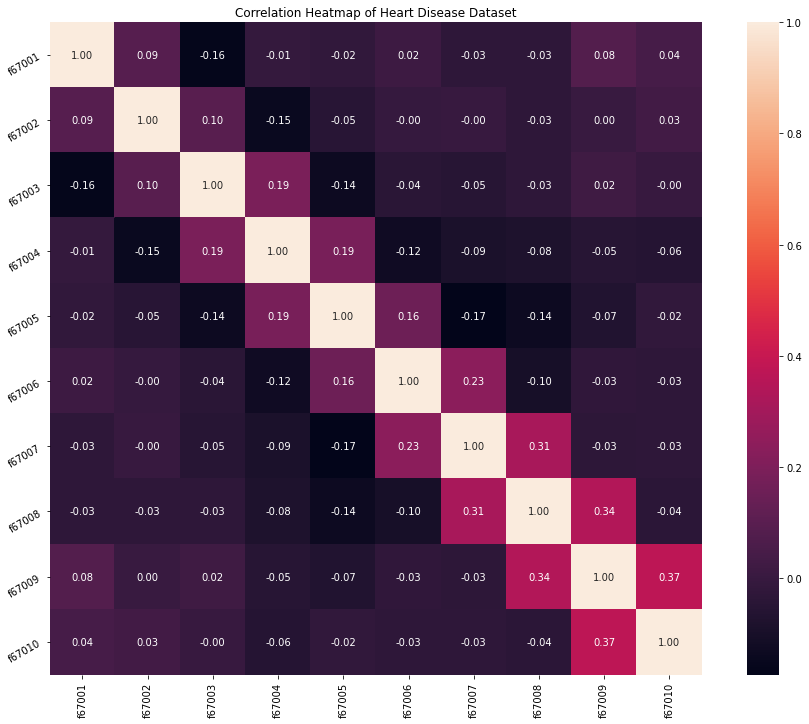

In [ ]:
cor = Featuredf.iloc[:, 67000:67010].corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(cor, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

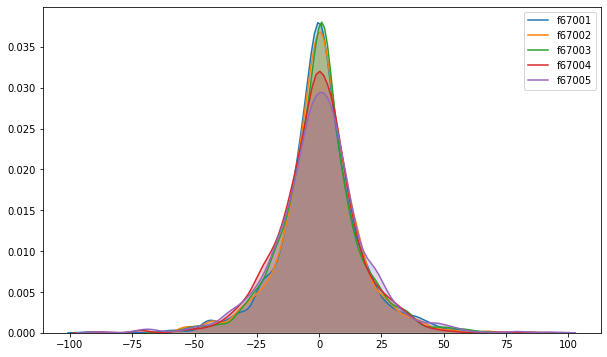

In [ ]:
p = Featuredf.iloc[:, 67000:67005]
f, ax = plt.subplots(figsize=(10,6))
for col in p:
    sns.kdeplot(p[col], shade=True)
# x = Featuredf.iloc[:, 67000:67005]
# x = pd.Series(x, name="f67000")
# ax = sns.kdeplot(x)
plt.show()

     Label_Numerical
0                  1
1                  1
2                  1
3                  1
4                  1
..               ...
182                0
183                0
184                0
185                0
186                0

[1287 rows x 1 columns]


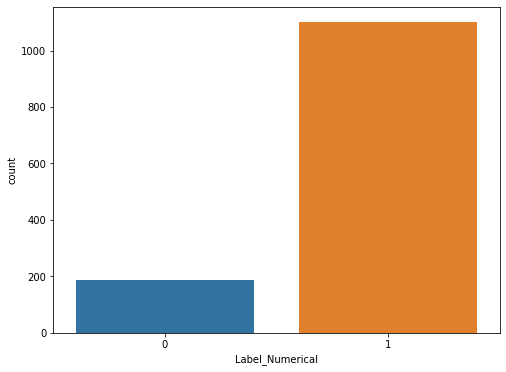

In [ ]:
Targetclass = pd.DataFrame(Targetclass)
print(Targetclass)
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x= Targetclass['Label_Numerical'], data=Featuredf)
plt.show()

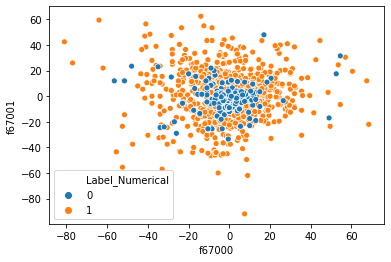

In [ ]:
sns.scatterplot(x= 'f67000', y='f67001', hue=Targetclass['Label_Numerical'], data=Featuredf)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7816816080>,
      dtype=object)

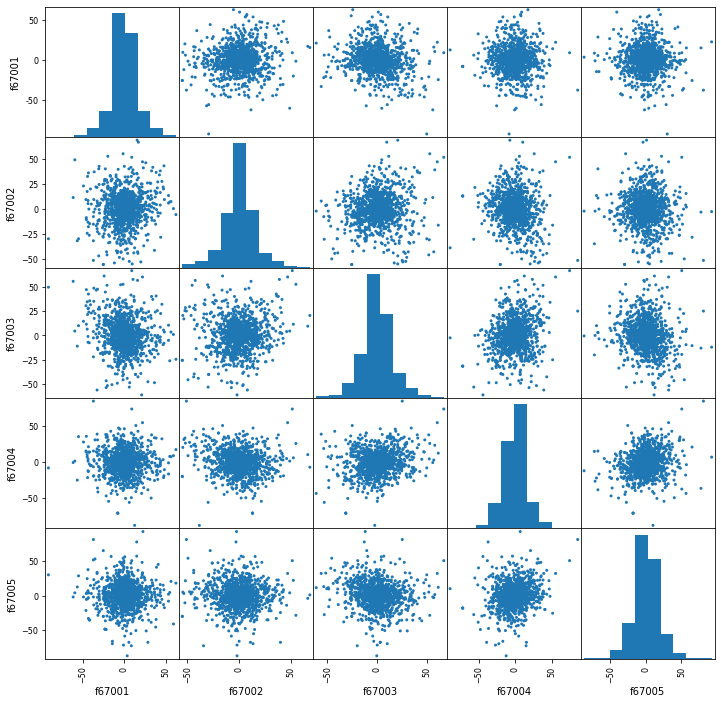

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(Featuredf.iloc[:, 67000:67005], alpha=1, ax=ax)

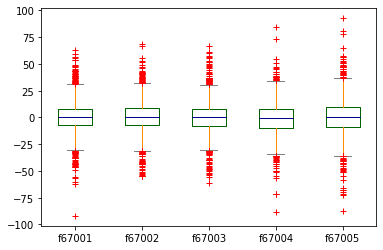

In [ ]:
df =Featuredf.iloc[:, 67000:67005]

color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}

df.plot.box(color=color, sym='r+')
# Out[40]: <matplotlib.axes._subplots.AxesSubplot at 0x7f3d0b5b6910>

<Figure size 1440x1440 with 0 Axes>

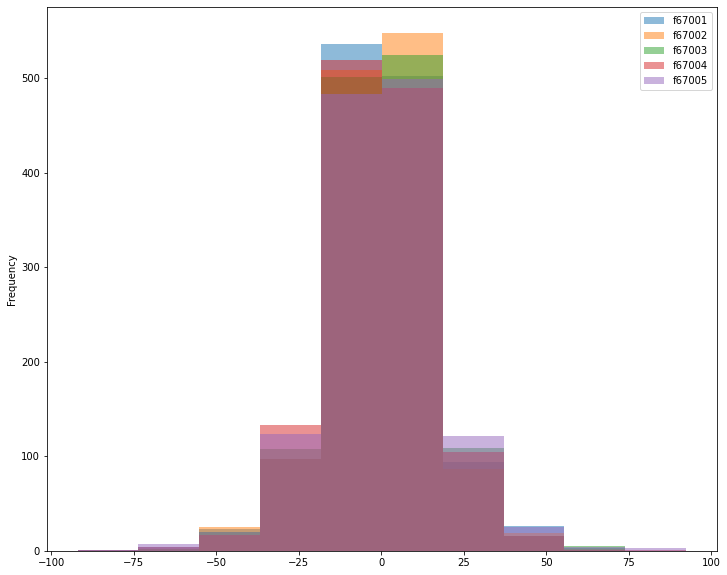

In [ ]:
df =Featuredf.iloc[:, 67000:67005]


df.plot.hist(alpha=0.5 ,figsize =(12,10))

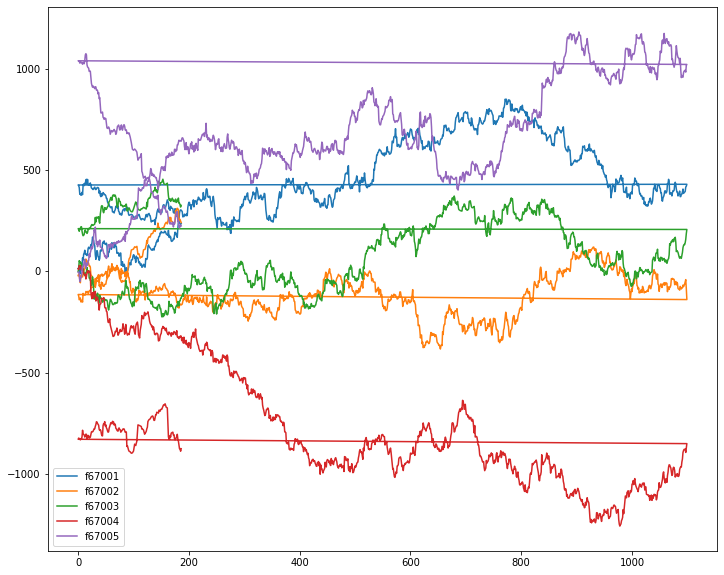

In [ ]:

df = Featuredf.iloc[:, 67000:67005]
df = df.cumsum()
df.plot(figsize=(12,10));


In [ ]:
from scipy import stats

In [ ]:
# #Precision
n = 5
SVM = np.array([1.0, 1.0, 0.9980907695440204, 1.0, 1.0, 1.0, 0.9980903682047424, 1.0, 0.9980908434737346, 1.0])

# XGBoost = np.array([0.9928394727338389, 0.9965062809762242, 0.9964526734363577, 0.9928140270192585, 0.9928185303320731, 0.9895328856459598, 0.9855756883374513, 0.9964348699179129, 0.9785553019168829, 0.9928231302789606])

LogReg = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

MLP = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

SGD = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

#spec
SVM_mean = np.mean(SVM)
# XGBoost_mean = np.mean(XGBoost)
LogReg_mean = np.mean(LogReg)
MLP_mean  = np.mean(MLP)
SGD_mean  = np.mean(SGD)

SVM_std = np.std(SVM)
# XGBoost_std = np.std(XGBoost)
LogReg_std = np.std(LogReg)
MLP_std = np.std(MLP)
SGD_std = np.std(SGD)

SVM_std = SVM_std / np.sqrt(n) * stats.t.ppf(1-0.05/2, n - 1)
print("SVM {} ".format(SVM_std))
# XGBoost_std = XGBoost_std/ np.sqrt(n) * stats.t.ppf(1-0.05/2, n - 1)
# print("XGBoost {}".format(XGBoost_std))
LogReg_std = LogReg_std/np.sqrt(n) * stats.t.ppf(1-0.05/2, n - 1)
print("Logistic:{}".format(LogReg_std))
MLP_std = MLP_std/ np.sqrt(n) * stats.t.ppf(1-0.05/2, n - 1)
print("MLP:{}".format( MLP_std))
SGD_std = SGD_std/ np.sqrt(n) * stats.t.ppf(1-0.05/2, n - 1)
print("SGD:{}".format(SGD_std))



SVM 0.0006259153516220318 
Logistic:0.0
MLP:0.0
SGD:0.0


In [ ]:
MLmodels = ['SVM','LogReg','SGD','MLP','XGBoost']
x_pos = np.arange(len(MLmodels))
val = [SVM_mean,LogReg_mean,SGD_mean,MLP_mean,XGBoost_mean]
error = [SVM_std,LogReg_std,SGD_std ,MLP_std,XGBoost_std]


No handles with labels found to put in legend.


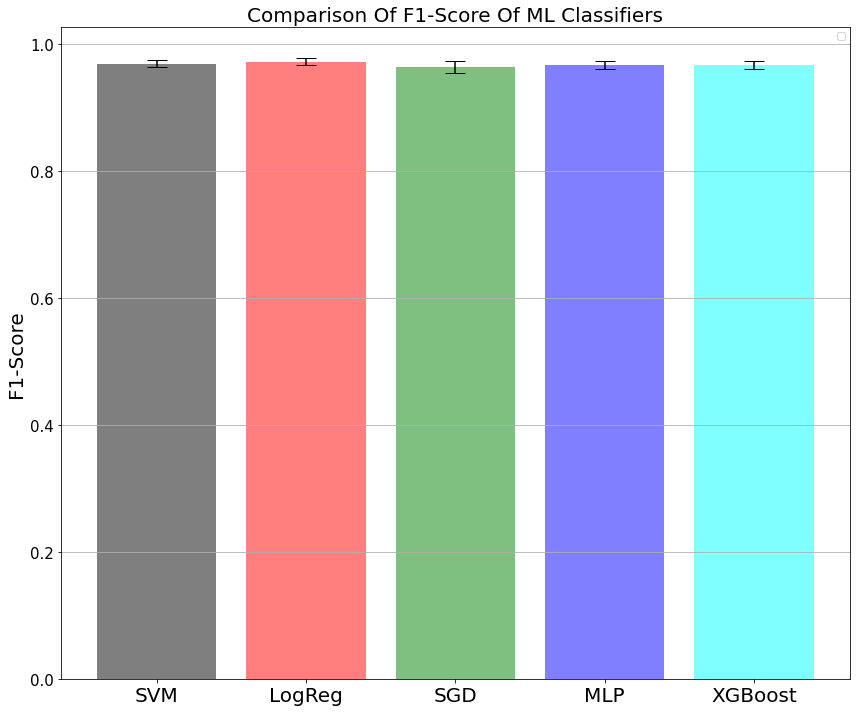

In [ ]:
width = 0.35
fig, ax = plt.subplots(figsize =(12,10))
ax.bar(x_pos, val , yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,color =['black', 'red', 'green', 'blue', 'cyan'])
# ax.bar(x_pos+width,pneu ,width ,align='center', alpha=0.5, capsize=10,label = 'Pneumonia')
ax.set_ylabel('F1-Score' , size = 20)
ax.set_xticks(x_pos)
ax.set_xticklabels(MLmodels)
ax.set_title('Comparison Of F1-Score Of ML Classifiers' ,size = 20)
ax.yaxis.grid(True)
ax.legend()
plt.xticks(size = 20)
plt.yticks(size = 15)
# Save the figure and show
plt.tight_layout()
plt.savefig(os.path.join('/content/drive/My Drive/(Prasun)AllCodes&Results/10FoldBarPlot3ClassClassifier','F1-ScoreComparison.png'))
plt.show()


# fig, ax = plt.subplots()

# ind = np.arange(N)    # the x locations for the groups
# width = 0.35         # the width of the bars
# ax.bar(ind, men_means, width, bottom=0*cm, yerr=men_std, label='Men')

# women_means = (145*cm, 149*cm, 172*cm, 165*cm, 200*cm)
# women_std = (30*cm, 25*cm, 20*cm, 31*cm, 22*cm)
# ax.bar(ind + width, women_means, width, bottom=0*cm, yerr=women_std,
#        label='Women')

# ax.set_title('Scores by group and gender')
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

# ax.legend()
# ax.yaxis.set_units(inch)
# ax.autoscale_view()

# plt.show()

In [ ]:
x = np.random.random_integers(1, 100, 5)
plt.hist(x ,bins= 1-)
plt.ylabel('No of times')
plt.show()

SyntaxError: ignored